In [1]:
# Calculate a regression line to predict AQI vs. MOBILITY.
# Create a scatter plot of the data to visually see if any linear trend exists.
# Split the data into training and testing using sklearn's train_test_split function.
# Use sklearn's linear regression model and fit the model to the training data.
# Use the test data to make new predictions. Calculate the MSE and R2 score for those predictions.
# Use model.score to calculate the R2 score for the test data.

In [2]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
data = pd.read_csv('data/test_regression.csv')
data.head()

,date,AQI_change,RETAIL_REC,GROCERY_PHARM,PARKS,TRANSIT_STATIONS,WORK,HOME
0,2/15/20,0.000000,5.009434,1.207547,16.197861,4.239011,0.264151,-0.505910
1,2/16/20,6.326448,8.095718,1.536524,19.747875,3.173021,0.335013,-0.747475
2,2/17/20,7.824512,7.273319,0.650759,30.464072,-1.834211,-22.633406,4.963043
3,2/18/20,4.111111,0.389899,-0.933198,6.787115,2.857868,-0.668687,0.662626
4,2/19/20,-1.271042,2.227083,0.534447,10.548023,3.012987,0.314583,0.164583


In [19]:
data.dtypes

date                 object
AQI_change          float64
RETAIL_REC          float64
GROCERY_PHARM       float64
PARKS               float64
TRANSIT_STATIONS    float64
WORK                float64
HOME                float64
dtype: object

In [20]:
data['date'] = pd.to_datetime(data['date'])

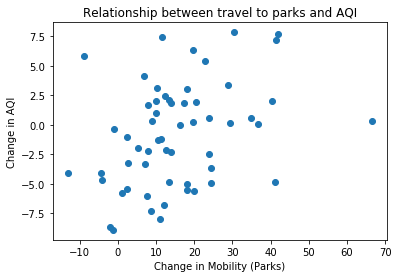

In [23]:
plt.scatter(data.PARKS, data.AQI_change)
plt.xlabel("Change in Mobility (Parks)")
plt.ylabel("Change in AQI")
plt.title("Relationship between travel to parks and AQI")
plt.show()

In [21]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = data["AQI_change"].values.reshape(-1, 1)
y = data["PARKS"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (57, 1) (57, 1)


Text(0, 0.5, 'PARKS')

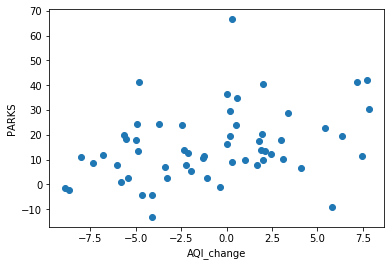

In [22]:
#data["AQI_change"].plot(figsize=(20,12));
### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("AQI_change")
plt.ylabel("PARKS")
### END SOLUTION

In [8]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [9]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [10]:
 # Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [11]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

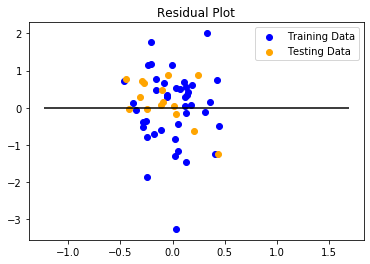

In [12]:
 # Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.savefig("Parks_Residual_Plot")
plt.show()
### END SOLUTION

In [13]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3635604508360131, R2: 0.31920781076232263
